In [6]:
!pip install pycaret

  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached pyod-0.9.4-py3-none-any.whl
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached imbalanced_l

### Contexte:  Problème d'entreprise
  - Une compagnie d'assurance souhaite améliorer ses prévisions de flux de trésorerie en prédisant mieux les frais des patients à l'aide de mesures démographiques et de base des risques pour la santé des patients au moment de l'hospitalisation.

### Objectif :
  -  Pour créer une application Web où les informations démographiques et de santé d'un patient sont saisies dans un formulaire Web pour prédire les frais.
### Tâches :
  - Entraînez et validez des modèles et développez un pipeline d'apprentissage automatique pour le déploiement.
  - Construisez une interface HTML basique avec un formulaire de saisie pour les variables indépendantes (âge, sexe, IMC, enfants, fumeur, région).
  - Créez un back-end de l'application Web à l'aide d'un cadre Flask.
  - Déployez l'application Web sur Heroku. Une fois déployé, il deviendra accessible au public et accessible via une URL Web.

In [8]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [9]:
from pycaret.regression import *

In [10]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [11]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9668,33302032.0000,5770.7915,0.8011,0.4683,0.4153
1,4503.7373,43746484.0000,6614.1123,0.7456,0.5633,0.4217
2,3880.5542,31795154.0000,5638.7192,0.5974,0.7645,0.4396
3,3747.6450,26805306.0000,5177.3843,0.7762,0.5015,0.5175
4,4471.0425,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7559,36166336.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1018,39192588.0000,6260.3984,0.7333,0.6434,0.4241
7,4928.1533,46415028.0000,6812.8574,0.7448,0.5887,0.4137
8,4609.3140,40370352.0000,6353.7666,0.7392,0.5686,0.5111
9,4665.8652,42596792.0000,6526.6216,0.7256,0.8131,0.4802


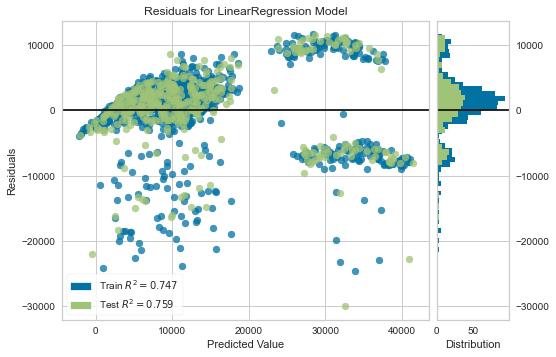

In [12]:
plot_model(lr)

# Experiment 2

In [17]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [21]:
s2[0].columns


Index(['bmi_Power2', 'age_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_2.0',
       'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0', 'age_8.0',
       'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_2.0', 'bmi_3.0',
       'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0', 'bmi_8.0', 'bmi_9.0',
       'smoker_no_multiply_sex_female', 'region_southwest_multiply_bmi_Power2',
       'children_1_multiply_bmi_Power2',
       'region_southeast_multiply_age_Power2', 'age_0.0_multiply_smoker_no',
       'children_0_multiply_bmi_Power2',
       'region_northeast_multiply_age_Power2',
       'children_0_multiply_age_Power2', 'smoker_no_multiply_children_0',
       'smoker_no_multiply_age_Power2', 'smoker_no_multiply_bmi_Power2',
       'age_Power2_multiply_bmi_5.0', 'sex_female_multi

In [22]:
# Formation et validation du modèle
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3138.0801,21456442.0000,4632.1099,0.8718,0.4183,0.3445
1,3403.4661,31614134.0000,5622.6445,0.8162,0.4450,0.3237
2,2987.8660,23329960.0000,4830.1099,0.7046,0.5459,0.3855
3,3106.7102,20590774.0000,4537.7056,0.8281,0.5212,0.4438
4,3417.2832,29899972.0000,5468.0869,0.7776,0.4848,0.3224
5,3204.8264,26061814.0000,5105.0771,0.8324,0.4147,0.3016
6,3036.5801,27201088.0000,5215.4663,0.8149,0.3894,0.3146
7,3545.1011,30867582.0000,5555.8604,0.8303,0.6944,0.3246
8,3265.1633,23436184.0000,4841.0933,0.8486,0.4149,0.3761
9,3402.2446,30238274.0000,5498.9341,0.8052,0.5294,0.3797


- Notez l'impact des transformations et de l'ingénierie automatique des fonctionnalités. **Le R2 a augmenté de 10% avec très peu d'effort**. Nous pouvons comparer le tracé résiduel du modèle de régression linéaire pour les deux expériences et observer l'impact des transformations et de l'ingénierie des caractéristiques sur l' hétéroscédasticité du modèle.

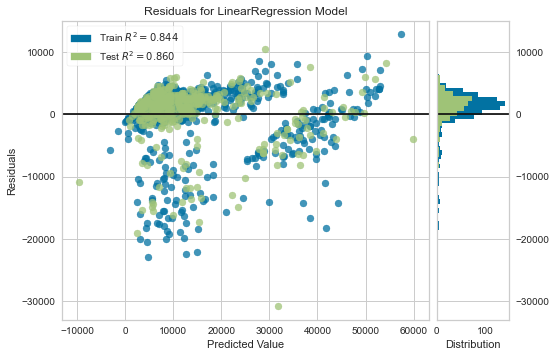

In [26]:
# tracer les résidus du modèle entraîné
plot_model(lr,plot='residuals')

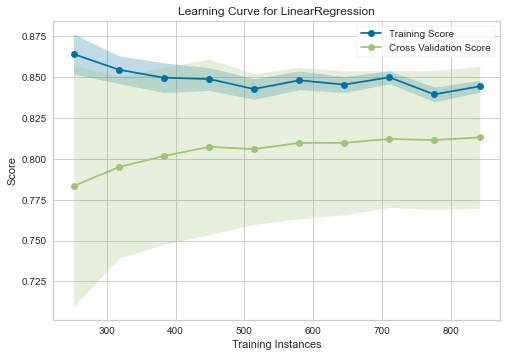

In [27]:
# tracer le learning curve du modèle entraîné
plot_model(lr,plot='learning')

- L'apprentissage automatique est un processus itératif . Le nombre d'itérations et de techniques utilisées dépend de l'importance de la tâche et de l'impact que cela aura si les prédictions sont erronées. La gravité et l'impact d'un modèle d'apprentissage automatique pour prédire le résultat d'un patient en temps réel dans l'unité de soins intensifs d'un hôpital sont bien plus qu'un modèle conçu pour prédire l'attrition des clients.
- Dans ce tutoriel, nous n'avons effectué que deux itérations et le modèle de régression linéaire de la deuxième expérience sera utilisé pour le déploiement. À ce stade, cependant, le modèle n'est encore qu'un objet dans le cahier. Pour l'enregistrer en tant que fichier pouvant être transféré et utilisé par d'autres applications, exécutez le code suivant :

In [28]:
# enregistrer le pipeline de transformation et le modèle 
#save_model (lr, model_name = 'deployment_18102021')
save_model(lr, 'deployment_18102021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [31]:
deployment_28042020 = load_model('deployment_18102021')

Transformation Pipeline and Model Successfully Loaded


In [32]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               

- Nous avons terminé notre première tâche de formation et de sélection d'un modèle à déployer. Le pipeline d'apprentissage automatique final et le modèle de régression linéaire sont désormais enregistrés en tant que fichier sur le lecteur local sous l'emplacement défini dans la fonction save_model().
- Dans cet exemple : c:/nom d'utilisateur/Downloads/deployment-heroku-pycaret/deployment_18102021.pkl).

### Précision : 
- Si vous vous souvenez de l'étape 1 ci-dessus, nous avons finalisé le modèle de régression linéaire qui a été formé sur 62 fonctionnalités qui ont été automatiquement conçues par PyCaret. Cependant, le front-end de notre application Web a un formulaire de saisie qui ne collecte que les six caractéristiques, c'est-à-dire l'âge, le sexe, l'IMC, les enfants, le fumeur, la région.

- Comment transformer 6 caractéristiques d'un nouveau point de données en temps réel en 56 caractéristiques sur lesquelles le modèle a été formé ? Avec une séquence de transformations appliquée lors de la formation du modèle, le codage devient une tâche de plus en plus complexe et chronophage.
- Dans PyCaret, toutes les transformations telles que l'encodage catégoriel, la mise à l'échelle, l'imputation des valeurs manquantes, l'ingénierie des caractéristiques et même la sélection des caractéristiques sont automatiquement exécutées en temps réel avant de générer des prédictions.

### NB :
- Imaginez la quantité de code que vous auriez dû écrire pour appliquer toutes les transformations dans un ordre strict avant même de pouvoir utiliser votre modèle pour les prédictions. **En pratique, lorsque vous pensez à l'apprentissage automatique, vous devez penser à l'ensemble du pipeline de ML et pas seulement au modèle**.

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
